In [ ]:
#Plot histogram and bell curve
#Use 3 Standard Deviation to remove Outliers
#Use Z Score Score to remove Outlier

#Exercise: Outlier removal using standard deviation and z score


In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,6)


In [5]:
import pandas as pd

df = pd.read_csv("weight-height.csv")
df.sample(5)
df.shape

(10000, 3)

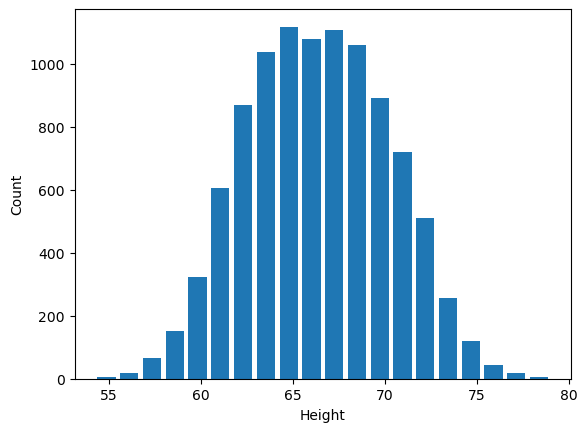

In [12]:
#Height in is inches
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv("weight-height.csv")
df.sample(5)

plt.hist(df.Height, bins = 20, rwidth = 0.8)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

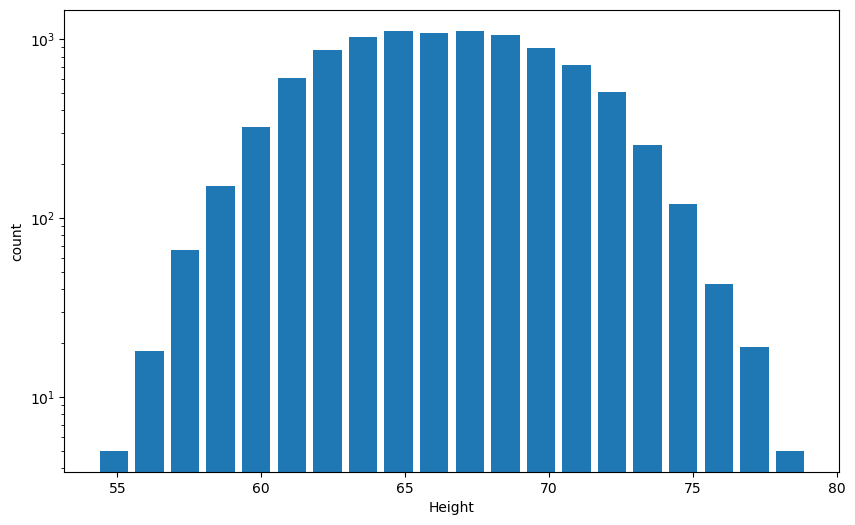

In [52]:
plt.hist(df.Height, bins = 20, rwidth = 0.8)
plt.xlabel("Height")
plt.ylabel("count")
plt.yscale("log")
plt.show()


In [4]:



df.Height.min()



NameError: name 'df' is not defined

In [14]:
df.describe()


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


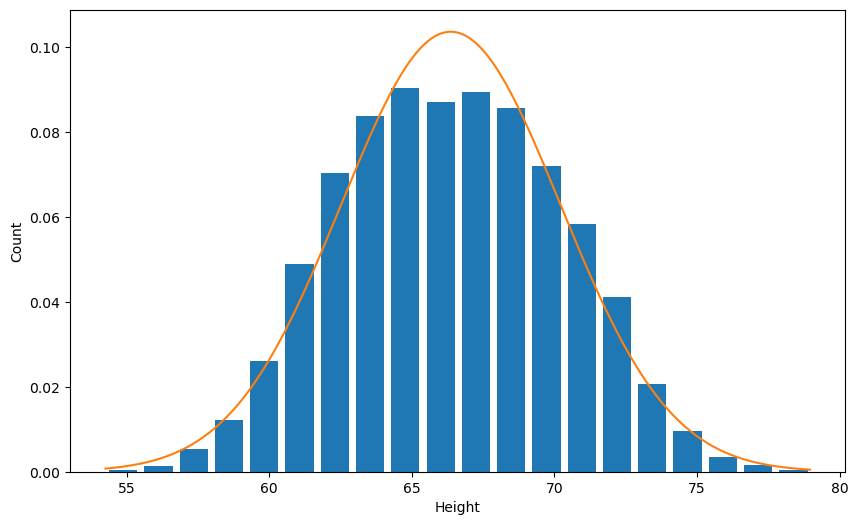

In [11]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10, 6)

# Read the dataset
df = pd.read_csv("weight-height.csv")
df.sample(5)

# Plot histogram of heights
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height")
plt.ylabel("Count")

# Plot bell curve (normal distribution)
rng = np.arange(df.Height.min(), df.Height.max(), 0.1) #it shows that [np.arange(start, stop, step)]
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

plt.show()



In [20]:
df.Height.mean()



66.36755975482124

In [21]:
df.Height.std()


3.8475281207732324

In [23]:
#first we use the 3 standard deviation to remove the outlier

#Outliner detection and removal using 3 standard deviation:

#One of the ways we can rmove outliners is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with the following upper and lower bounds.


upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714094

In [7]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit


54.82497539250154

In [10]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit


((df["Height"] >= lower_limit) & (df["Height"] <= upper_limit)).mean() * 100



#upper limit ra lower lit bich ko data kati cha vanira measure gareko



99.92999999999999

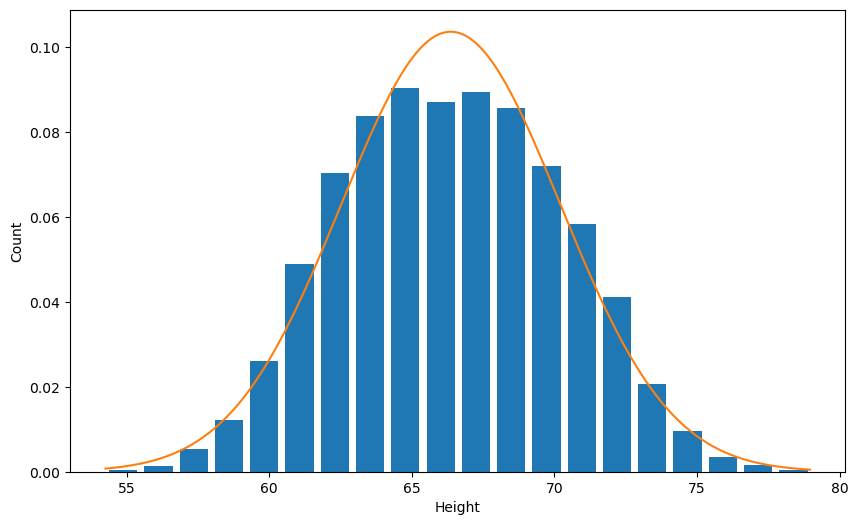

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [28]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10, 6)

# Read the dataset
df = pd.read_csv("weight-height.csv")
df.sample(5)

# Calculate upper and lower limits
upper_limit = df.Height.mean() + 3*df.Height.std()
lower_limit = df.Height.mean() - 3*df.Height.std()

# Plot histogram of heights
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height")
plt.ylabel("Count")

# Plot bell curve (normal distribution)
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

plt.show()

# Identify outliers
outliers = df[(df.Height > upper_limit) | (df.Height < lower_limit)]
outliers

#outliers.shape #check the shape of outliers



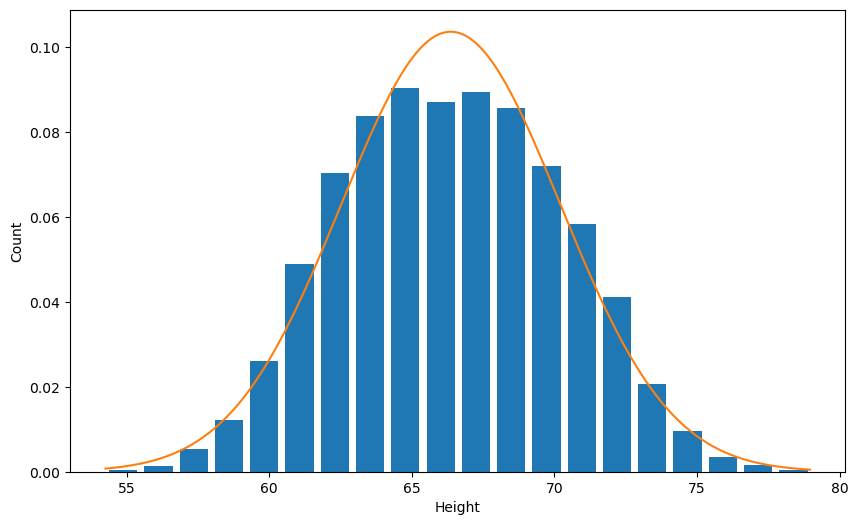

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [25]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10, 6)

# Read the dataset
df = pd.read_csv("weight-height.csv")
df.sample(5)

# Calculate upper and lower limits
upper_limit = df.Height.mean() + 3*df.Height.std()
lower_limit = df.Height.mean() - 3*df.Height.std()

# Plot histogram of heights
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height")
plt.ylabel("Count")

# Plot bell curve (normal distribution)
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

plt.show()

# Identify non-outliers with st.deviation
non_outliers = df[(df.Height < upper_limit) & (df.Height > lower_limit)]
non_outliers

#non_outliers.shape

In [29]:
#this is the shape of filtered out dataframe:

non_outliers.shape


(9993, 3)

In [30]:
#this is the shape of outliers in dataframe:

outliers.shape


(7, 3)

In [33]:
#Alternative method:

df.shape[0] - non_outliers.shape[0]

#if you do this you will find that you need to remove seven outliers using this syntax

7

In [34]:
df.shape[0] - outliers.shape[0]



9993

In [ ]:
#similar things z-scores just tells you the it gives you a number which
#will tell us how many standard deviation you are away from the mean so 
#lets say your data point is three standard deviation away then the z-score for that data point will be three
#if it is 2.5 standard deviation away then it will be the 2.5 

In [ ]:
#Outlier detection and removal using Z Score:

Z score indicate how many standard deviation away a data point is.
for example in our case mean is 66.37 and standard deviation is 3.84.
If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away(77.91 = 66.37 + 3*3.84)

    calculate the Z Score:

    Z = x-u/

Z score = x - mean / standard deviation


Z Score means how many standard deviation you are away from mean.

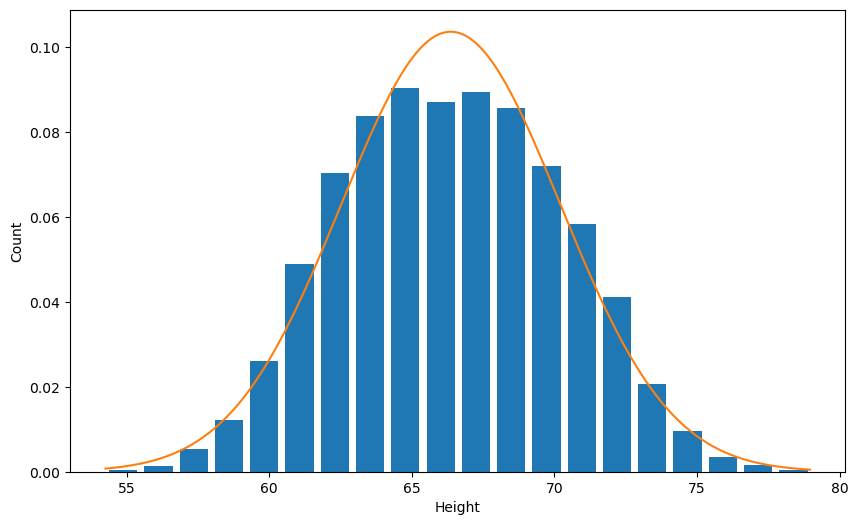

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [37]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10, 6)

# Read the dataset
df = pd.read_csv("weight-height.csv")
df.sample(5)

# Calculate upper and lower limits
upper_limit = df.Height.mean() + 3*df.Height.std()
lower_limit = df.Height.mean() - 3*df.Height.std()

# Plot histogram of heights
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height")
plt.ylabel("Count")

# Plot bell curve (normal distribution)
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

plt.show()

# Identify non-outliers
non_outliers = df[(df.Height < upper_limit) & (df.Height > lower_limit)]
non_outliers

# Calculate the z-score
df["zscore"] = (df["Height"] - df["Height"].mean()) / df["Height"].std()
df.head(5)



In [38]:
(73.847017-66.37)/3.84


1.9471398437499974

In [39]:
#Now lets figure out all the datapoints which has a Z score more than three

df[df["zscore"]>3]





,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [41]:

df[df["zscore"]<-3]






,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


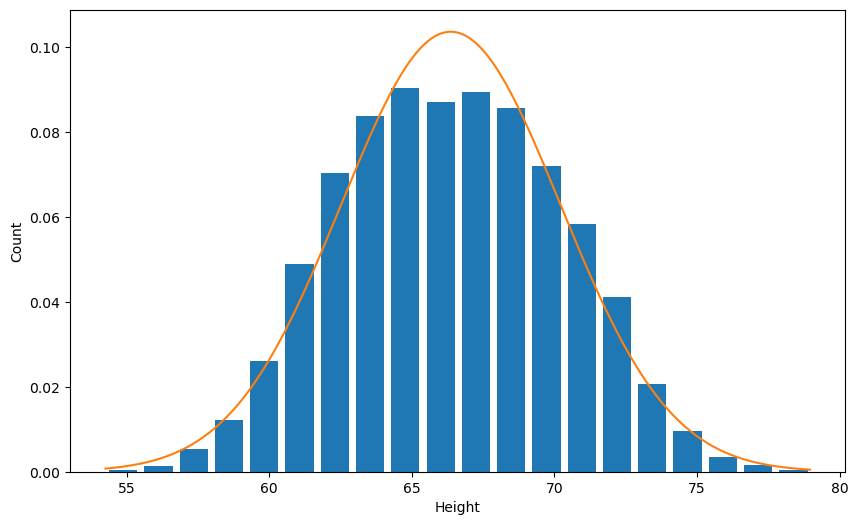

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [45]:
#now lets view all those outliers by having ths conditio

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10, 6)

# Read the dataset
df = pd.read_csv("weight-height.csv")
df.sample(5)

# Calculate upper and lower limits
upper_limit = df.Height.mean() + 3*df.Height.std()
lower_limit = df.Height.mean() - 3*df.Height.std()

# Plot histogram of heights
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height")
plt.ylabel("Count")

# Plot bell curve (normal distribution)
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

plt.show()

# Identify non-outliers
non_outliers = df[(df.Height < upper_limit) & (df.Height > lower_limit)]
non_outliers

# Calculate the z-score
df["zscore"] = (df["Height"] - df["Height"].mean()) / df["Height"].std()
df.head(5)

# Identify outliers based on z-score
outliers = df[(df["zscore"] > 3) | (df["zscore"] < -3)]
outliers



#outliers.shape

In [48]:
#Now to filter this outliners 



non_outliners = df[(df.zscore > -3) & (df.zscore < 3)]
non_outliners





,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [49]:


df.shape[0] - non_outliners.shape[0]





7